# Features Extractions Techniques

## One-hot Encoding

One-hot encoding is a technique used to convert categorical variables into a format that can be easily understood by machine learning algorithms. It creates a binary vector for each category in the variable, where all values are zero except for the category being represented, which is set to one.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.DataFrame({'team': ['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
                   'points': [25, 12, 15, 14, 19, 23, 25, 29]})

#view DataFrame
print(df)

  team  points
0    A      25
1    A      12
2    B      15
3    B      14
4    B      19
5    B      23
6    C      25
7    C      29


In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column
encoder_df = pd.DataFrame(encoder.fit_transform(df[['team']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

#view final df
print(final_df)

  team  points    0    1    2
0    A      25  1.0  0.0  0.0
1    A      12  1.0  0.0  0.0
2    B      15  0.0  1.0  0.0
3    B      14  0.0  1.0  0.0
4    B      19  0.0  1.0  0.0
5    B      23  0.0  1.0  0.0
6    C      25  0.0  0.0  1.0
7    C      29  0.0  0.0  1.0


## Bag of words
The Bag-of-words model is a technique that represents text as a "bag" of individual words, disregarding grammar and word order but keeping track of the frequency of each word. In this model, a document is represented as a vector of word frequencies, where each dimension corresponds to a specific word. BoW is a simple and effective approach to text representation, but it ignores the context and order of words in a sentence or document.

**Step 1: Collect Data**

 العلم نور ينير الدرب للإنسان في الحياة

الصداقة كالزهرة، تحتاج العناية والاهتمام

الحياة قصيرة، لا تضيع وقتك في الكراهية

For this small example, let’s treat each line as a separate “document” and the 3 lines as our entire corpus of documents.


**Step 2: Design the Vocabulary**

Now we can make a list of all of the words in our model vocabulary.

The unique words here (the data is not preprocessed) are:

“العلم”
“نور”
“ينير”
“لفظـــاً”
“الدرب”
“للإنسان”
“الصداقة”
“كالزهرة،”
“آتحتاج”
“العناية”
“والاهتمام”
“الحياة”
“قصيرة”
“لا”
“تضيع”
“وقتك”
“في”
“الكراهية”
That is a vocabulary of 18 words from a corpus containing 19 words.

**Step 3: Create Document Vectors**

The next step is to score the words in each document.

The objective is to turn each document of free text into a vector that we can use as input or output for a machine learning model.

Because we know the vocabulary has 18 words, we can use a fixed-length document representation of 18, with one position in the vector to score each word.

The simplest scoring method is to mark the presence of words as a boolean value, 0 for absent, 1 for present.

Using the arbitrary ordering of words listed above in our vocabulary, we can step through the first document (“ العلم نور ينير الدرب للإنسان في الحياة“) and convert it into a binary vector.

1 : “العلم”
1 : “نور”
1 : “ينير”
1 : “الدرب”
1 : “للإنسان”
1 : “في”
1 : “الحياة”
0 : “الصداقة”
0 : “كالزهرة،”
0 : “آتحتاج”
0 : “العناية”
0 : “والاهتمام”
0 : “قصيرة”
0 : “لا”
0 : “تضيع”
0 : “وقتك”
0 : “الكراهية”

D1 = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
import re
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def arabic_bag_of_words(sentences):
    # Tokenize the sentences into words
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Count the occurrence of each word
    word_counts = Counter()
    for sentence in tokenized_sentences:
        word_counts.update(sentence)

    # Create a dictionary with each word as the key and its count as the value
    bag_of_words = dict(word_counts)

    # Create a list of all unique words in the bag of words
    unique_words = list(bag_of_words.keys())

    # Create a binary representation for each sentence
    binary_sentences = []
    for sentence in tokenized_sentences:
        binary_sentence = []
        for word in unique_words:
            if word in sentence:
                binary_sentence.append(1)
            else:
                binary_sentence.append(0)
        binary_sentences.append(binary_sentence)

    return bag_of_words, binary_sentences

In [ ]:
sentences = ["العلم نور ينير الدرب للإنسان", "الصداقة كالزهرة، تحتاج العناية والاهتمام", "الحياة قصيرة، لا تضيع وقتك في الكراهية"]
bow, binary_bow = arabic_bag_of_words(sentences)
print("The BOW for the corpus:\n")
print(bow)
print("The Encoding for each sentence in the corpus:\n")
print(binary_bow)

The BOW for the corpus:

{'العلم': 1, 'نور': 1, 'ينير': 1, 'الدرب': 1, 'للإنسان': 1, 'الصداقة': 1, 'كالزهرة،': 1, 'تحتاج': 1, 'العناية': 1, 'والاهتمام': 1, 'الحياة': 1, 'قصيرة،': 1, 'لا': 1, 'تضيع': 1, 'وقتك': 1, 'في': 1, 'الكراهية': 1}
The Encoding for each sentence in the corpus:

[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]]


We can conclude that As the vocabulary size increases, so does the vector representation of documents. Which leads to a vector with lots of zero scores, called a sparse vector or sparse representation.

Sparse vectors require more memory and computational resources when modeling and the vast number of positions or dimensions can make the modeling process very challenging for traditional algorithms.

A more sophisticated approach is to create a vocabulary of grouped words. This both changes the scope of the vocabulary and allows the bag-of-words to capture a little bit more meaning from the document.

In this approach, each word or token is called a “gram”. Creating a vocabulary of two-word pairs is, in turn, called a bigram model. Again, only the bigrams that appear in the corpus are modeled, not all possible bigrams.

# N-grams

N-grams refer to a sequence of N words or characters. N-grams captures the context in which the words are used together. For example, it might be a good idea to consider bigrams like “New York” instead of breaking it into individual words like “New” and “York”

In [ ]:
# Example on bi-grams model
from nltk import ngrams

sentence = 'وَما ضِقْتُ عن آيٍ به وَعِظــــاتِ'

ngram = ngrams(sentence.split(' '), n=3)

for x in ngram:
    print(x)

('وَما', 'ضِقْتُ', 'عن')
('ضِقْتُ', 'عن', 'آيٍ')
('عن', 'آيٍ', 'به')
('آيٍ', 'به', 'وَعِظــــاتِ')


## TF-IDF Technique

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a commonly used technique in information retrieval and natural language processing to measure the importance of a word in a document or corpus of documents.

TF (Term Frequency) measures how often a term appears in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document.
***
$$TF = \frac{Term Frequency in a document}{ total number of terms in that document}$$
***
IDF (Inverse Document Frequency) measures the importance of a term in the corpus. It is calculated as the logarithm of the total number of documents in the corpus divided by the number of documents containing the term.

***
$$IDF(t) = log\frac{Number of documents}{ Number of documents contains the term} $$

***
The TF-IDF score for a term in a document is calculated as the product of its TF and IDF values.
***
$$ TF-IDF = TF * IDF $$
***
The higher the TF-IDF score of a term, the more important it is to that document.

### Example

Sentence 1 : The car is driven on the road.

Sentence 2: The truck is driven on the highway.

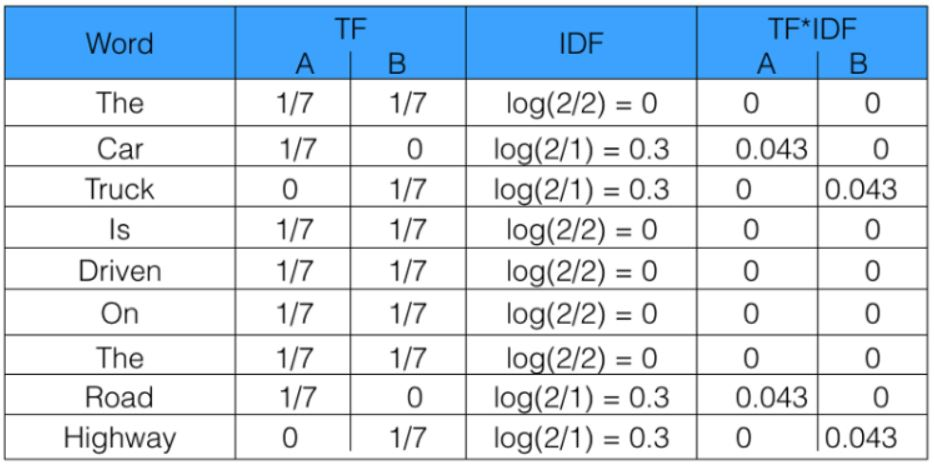

From the above table, we can see that TF-IDF of common words was zero, which shows they are not significant. On the other hand, the TF-IDF of “car” , “truck”, “road”, and “highway” are non-zero. These words have more significance.

In [ ]:
Document1= "سوف تمطر اليوم."
Document2= "أنا لن أخرج اليوم."
Document3= "أنا سوف أشاهد الدوري الممتاز."
Doc = [Document1 ,Document2 ,Document3]
print(Doc)

['سوف تمطر اليوم.', 'أنا لن أخرج اليوم.', 'أنا سوف أشاهد الدوري الممتاز.']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(Doc)

In [ ]:
#Vectorize process
analyze = vectorizer.build_analyzer()
print('Document 1',analyze(Document1))
print('Document 2',analyze(Document2))
print('Document 3',analyze(Document3))
print('Document transform',X.toarray())

Document 1 ['سوف', 'تمطر', 'اليوم']
Document 2 ['أنا', 'لن', 'أخرج', 'اليوم']
Document 3 ['أنا', 'سوف', 'أشاهد', 'الدوري', 'الممتاز']
Document transform [[0.         0.         0.         0.         0.         0.51785612
  0.68091856 0.51785612 0.        ]
 [0.5628291  0.         0.42804604 0.         0.         0.42804604
  0.         0.         0.5628291 ]
 [0.         0.49047908 0.37302199 0.49047908 0.49047908 0.
  0.         0.37302199 0.        ]]


The output signifies the important words which add context to 3 sentences.

## Cosine Similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space based on the cosine of the angle between them, resulting in a value between -1 and 1. The value -1 means that the vectors are opposite, 0 represents orthogonal vectors, and value 1 signifies similar vectors.

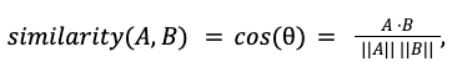

The cosine similarity is often used in text analytics to compare documents and determine if they’re similar and how much. In that case, documents must be represented as a vector, where a unique word is a dimension and the frequency or weight of that unique word in the document represents the value of that specific dimension. After the transformation of documents to vectors is done, comparison using cosine similarity is relatively straightforward — we measure the cosine of the angle between their vectors. If the angle between vectors (documents) is small, then the cosine of the angle is high, and hence, documents are similar. Opposite to that, if the angle between vectors (documents) is large, then the cosine of the angle is low, resulting in opposite documents (not similar). Cosine similarity considers the orientation of the vectors, but it does not take their magnitudes into account.

### Example

our goal is to calculate the cosine similarity of the two documents given below.

Document 1 = 'the best data science course'

Document 2 = 'data science is popular'

After creating a word table from the documents, the documents can be represented by the following vectors:

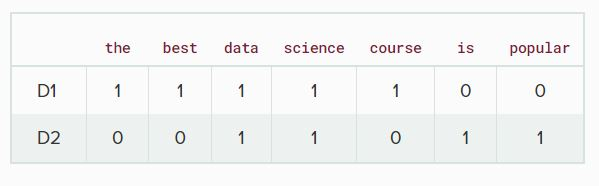

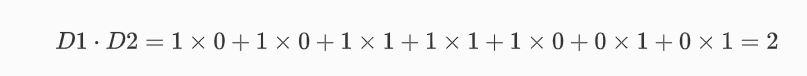

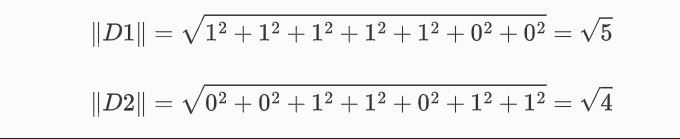

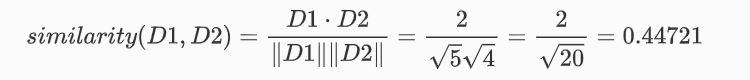

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
twitter = """
Twitter is an online social media and social networking service owned and operated by American company X Corp.,
the legal successor of Twitter, Inc. Twitter users outside the United States are legally served by the Ireland-based
Twitter International Unlimited Company, which makes these users subject to Irish and European Union data protection laws.
On Twitter users post texts, photos and videos known as 'tweets'. Registered users can tweet, like, 'retweet' tweets,
and direct message (DM) other registered users, while unregistered users only have the ability to view public tweets.
Users interact with Twitter through browser or mobile frontend software, or programmatically via its APIs.
"""
facebook = """
Facebook is an online social media and social networking service owned by American technology giant Meta Platforms.
Created in 2004 by Mark Zuckerberg with fellow Harvard College students and roommates Eduardo Saverin, Andrew McCollum,
Dustin Moskovitz, and Chris Hughes, its name derives from the face book directories often given to American university students.
Membership was initially limited to only Harvard students, gradually expanding to other North American universities and,
since 2006, anyone over 13 years old. As of December 2022, Facebook claimed 2.96 billion monthly active users, and ranked third
worldwide among the most visited websites. It was the most downloaded mobile app of the 2010s. Facebook can be accessed from devices
with Internet connectivity, such as personal computers, tablets and smartphones. After registering, users can create a profile
revealing information about themselves. They can post text, photos and multimedia which are shared with any other users who have
agreed to be their friend' or, with different privacy settings, publicly. Users can also communicate directly with each other with
Messenger, join common-interest groups, and receive notifications on the activities of their Facebook friends and the pages they follow.
"""
tiktok = """
TikTok, and its Chinese counterpart Douyin (Chinese: 抖音; pinyin: Dǒuyīn), is a short-form video hosting service owned by ByteDance.
It hosts user-submitted videos, which can range in duration from 3 seconds to 10 minutes. Since their launches, TikTok and Douyin have
gained global popularity.[6][7] In October 2020, TikTok surpassed 2 billion mobile downloads worldwide. Morning Consult named TikTok the
third-fastest growing brand of 2020, after Zoom and Peacock. Cloudflare ranked TikTok the most popular website of 2021,
surpassing google.com.
"""
instagram = """
Instagram is a photo and video sharing social networking service owned by American company Meta Platforms. The app allows users to
upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or
with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow
other users to add their content to a personal feed. Instagram was originally distinguished by allowing content to be framed only in a
square (1:1) aspect ratio of 640 pixels to match the display width of the iPhone at the time. In 2015, this restriction was eased with
an increase to 1080 pixels. It also added messaging features, the ability to include multiple images or videos in a single post, and a
Stories feature—similar to its main competitor Snapchat—which allowed users to post their content to a sequential feed, with each post
accessible to others for 24 hours. As of January 2019, Stories is used by 500 million people daily.
"""

In [ ]:
documents = [twitter, facebook, tiktok, instagram]
count_vectorizer = CountVectorizer(stop_words="english")
sparse_matrix = count_vectorizer.fit_transform(documents)
doc_term_matrix = sparse_matrix.todense()

In [ ]:
doc_term_array = np.asarray(doc_term_matrix)

In [ ]:
similarity_matrix = cosine_similarity(doc_term_array, doc_term_array)

In [ ]:
print(similarity_matrix)

[[1.         0.28200511 0.03526591 0.33548387]
 [0.28200511 1.         0.05377329 0.26233033]
 [0.03526591 0.05377329 1.         0.03526591]
 [0.33548387 0.26233033 0.03526591 1.        ]]


# Word2Vec

Is a neural network-based technique used to create word embeddings, which are dense vector representations of words that capture their semantic and syntactic meanings. Word2Vec is trained on a large corpus of text data and is able to capture relationships between words based on their co-occurrence patterns.

Word2vec has two types, Continuous Bag-of-Words Model (CBOW) and Continuous Skip-gram Model.

- Continous Bag-of-words: Predicts the words according to the given context
- Continous Skip-gram: Predicts the context according to a given word

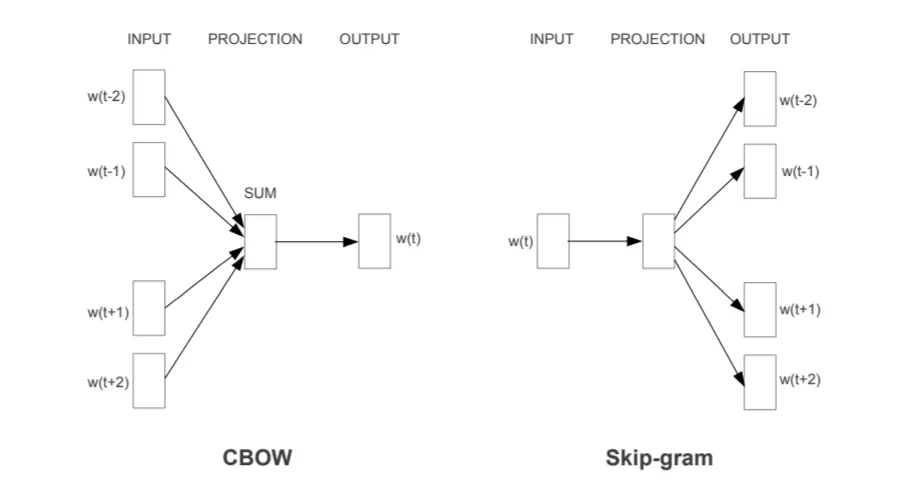

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset + Text Preprocessing

In [ ]:
dataset = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin1')

Very basic text preproccessing by removing punctuations, numbers. We have also cleaned the data by removing characters including and after 'https' in the text.

In [ ]:
import re
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https')
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)


Size of the dataset.

In [ ]:
print(len(texts))

41157


## Training the word2vec model

In [ ]:
from gensim.models import Word2Vec


In [ ]:
sentences = [line.split() for line in texts]

w2v = Word2Vec(sentences, vector_size=100, window=5, workers=4, epochs=10, min_count=5)

In [ ]:
print(sentences[20:25])

[['with', 'nations', 'inficted', 'with', 'covid', 'the', 'world', 'must', 'not', 'play', 'fair', 'with', 'china', 'goverments', 'must', 'demand', 'china', 'adopts', 'new', 'guilde', 'lines', 'on', 'food', 'safty', 'the', 'chinese', 'goverment', 'is', 'guilty', 'of', 'being', 'irosponcible', 'with', 'life', 'on', 'a', 'global', 'scale'], [], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 'adult', 'cinema', 'hotmovies', 'iptvnew', 'iptv', 'adult'], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 

## Working with word2vec

Finding the vocabulary of the model can be useful in several general applications, and in this case, provides us with a list of words we can try and use other functions.

In [ ]:
words = list(w2v.wv.key_to_index)

In [ ]:
print(words)

['the', 'to', 'and', 'of', 'covid', 'a', 'in', 'coronavirus', 'for', 'is', 'are', 'i', 'you', 'on', 's', 'this', 'prices', 'at', 'it', 'food', 'supermarket', 'we', 'store', 'that', 'with', 'grocery', 'have', 'as', 'be', 'people', 't', 'from', 'amp', 'all', 'can', 'consumer', 'your', 'not', 'will', 'they', 'my', 'our', 'up', 'out', 'has', 'or', 'by', 'more', 'but', 'shopping', 'if', 'online', 'how', 'their', 'during', 'pandemic', 'so', 'now', 'no', 'what', 'get', 'about', 'who', 'need', 'workers', 'panic', 'just', 'there', 'us', 'do', 'like', 'time', 'sanitizer', 'home', 'was', 'an', 'demand', 'go', 'when', 'some', 'help', 'hand', 'stock', 'don', 're', 'going', 'one', 'm', 'me', 'here', 'due', 'buying', 'been', 'oil', 'new', 'crisis', 'please', 'work', 'them', 'after', 'other', 'toilet', 'because', 'only', 'these', 'should', 'toiletpaper', 'than', 'paper', 'today', 'over', 'stay', 'local', 'retail', 'keep', 'buy', 'stores', 'many', 'shelves', 'still', 'being', 'make', 'delivery', 'those

In [ ]:
print(len(words))

10630


Finding the embedding of a given word can be useful when we’re trying to represent sentences as a collection of word embeddings, like when we’re trying to make a weight matrix for the embedding layer of a network.

In [ ]:
print( w2v.wv['computer'] )

[ 3.75220388e-01  1.39879167e-01  2.16265451e-02  2.77988762e-02
  1.24714365e-02 -3.40729713e-01 -1.27584368e-01  2.78282225e-01
  6.51902556e-02 -9.72385332e-02 -1.64978430e-01 -4.69658971e-02
  6.93186373e-03  1.08763166e-01  2.62374401e-01  1.51243275e-02
  2.29218766e-01 -1.71880782e-01 -4.55186255e-02 -4.34809417e-01
  3.62228543e-01  1.40546873e-01 -3.93949933e-02 -1.36177510e-01
 -1.68832764e-01  1.38010710e-01 -2.15622038e-01 -7.64478371e-02
  9.45470855e-02  2.52582543e-02  1.57611698e-01  2.42399558e-01
 -1.89697251e-01 -2.53958464e-01 -2.35520005e-02  1.32776380e-01
 -2.84352571e-01 -1.75638109e-01  2.63462160e-02  1.10751256e-01
 -1.64896116e-01 -9.89213437e-02  9.75764997e-05 -9.28355604e-02
  1.46178022e-01 -2.11890545e-02 -1.48436412e-01 -2.94669252e-02
  5.69259636e-02  6.76032156e-02  3.26291844e-02  1.78758372e-02
 -1.29484177e-01 -8.53232667e-02 -1.16662487e-01 -1.20826013e-01
  2.06902120e-02  2.31481895e-01  1.46799520e-01  8.93283337e-02
 -3.93454880e-02 -1.81681

We can also find out the similarity between given words (the cosine distance between their vectors).

In [ ]:
w2v.wv.similarity('vladimir', 'putin')

0.7850294

In [ ]:
w2v.wv.similarity('vladimir', 'modi')

0.6419248

With the gensim, we can also find the most similar words to a given word.

In [ ]:
print(w2v.wv.most_similar('pay'))

[('paid', 0.6700916290283203), ('paying', 0.6683618426322937), ('bills', 0.6365159749984741), ('wages', 0.608108401298523), ('cancel', 0.5962357521057129), ('benefits', 0.5804385542869568), ('rent', 0.5752778649330139), ('raise', 0.5675707459449768), ('leave', 0.5609807372093201), ('hazard', 0.5312783122062683)]


In [ ]:
print(w2v.wv.most_similar('covid'))

[('coronavirus', 0.6343101859092712), ('virus', 0.5508179664611816), ('corona', 0.45400065183639526), ('coronavirusindia', 0.44306936860084534), ('disease', 0.43879321217536926), ('convid', 0.4316459000110626), ('workingfromhome', 0.42733460664749146), ('epidemic', 0.4151495099067688), ('flattenthecurve', 0.4101322591304779), ('sarscov', 0.4083777368068695)]


In [ ]:
print(w2v.wv.most_similar('india'))

[('nigeria', 0.774692714214325), ('pakistan', 0.7308310270309448), ('odisha', 0.6651332974433899), ('kenya', 0.6447511911392212), ('africa', 0.6353302001953125), ('irvpaswan', 0.6303402185440063), ('drharshvardhan', 0.6281715035438538), ('oman', 0.62654048204422), ('icis', 0.615267276763916), ('pmoindia', 0.615140974521637)]


Similarly, we can use the same function to find analogies of the form: if x:y, then z:?. Here we enter the known relation x,y in the positive parameter, and the term who’s analogy has to be found in the negative parameter.

In [ ]:
print(w2v.wv.most_similar(positive=['russian', 'russia'], negative=['arab']))

[('saudi', 0.7783573269844055), ('arabia', 0.7557808756828308), ('putin', 0.7512619495391846), ('trump', 0.7162541151046753), ('opec', 0.7140222191810608), ('donald', 0.6535751223564148), ('mbs', 0.6451053619384766), ('saudis', 0.6402603387832642), ('iran', 0.6361701488494873), ('agreed', 0.6112414598464966)]


We also have this method which works similar to an "odd one out" situation.

In [ ]:
w2v.wv.doesnt_match(['grocery', 'covid', 'coronavirus'])


'grocery'

## Visualising word vectors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def display_word_embedding(model, words=None, sample=0, method='pca', perplexity=5):
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.wv.key_to_index.keys()), sample)
        else:
            words = list(model.wv.key_to_index.keys())

    # Get word vectors using model.wv
    word_vectors = np.array([model.wv[w] for w in words if w in model.wv.key_to_index])

    # Use PCA or t-SNE for dimensionality reduction
    if method == 'pca':
        reduced_vectors = PCA(n_components=2).fit_transform(word_vectors)
    elif method == 'tsne':
        reduced_vectors = TSNE(n_components=2, perplexity=perplexity, random_state=0).fit_transform(word_vectors)
    else:
        raise ValueError("Method must be either 'pca' or 'tsne'.")

    plt.figure(figsize=(8, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], edgecolors='k', c='r')

    for word, (x, y) in zip(words, reduced_vectors):
        plt.text(x + 0.05, y + 0.05, word)

    plt.title(f'{method.upper()} of Word Vectors')
    plt.xlabel(f'{method.upper()} Component 1')
    plt.ylabel(f'{method.upper()} Component 2')
    plt.grid()
    plt.show()


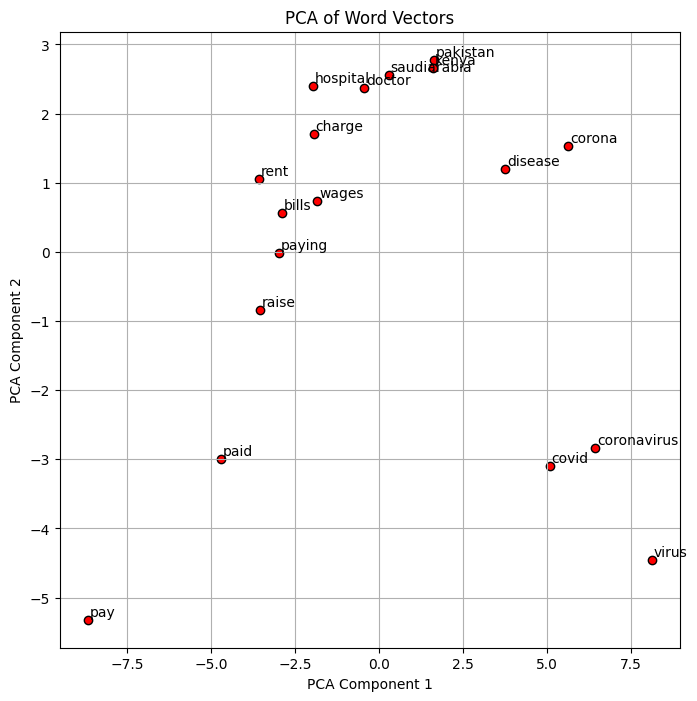

In [ ]:
# Example usage for PCA
display_word_embedding(w2v, ['coronavirus', 'covid', 'virus', 'corona', 'disease',
                               'saudiarabia', 'doctor', 'hospital', 'pakistan',
                               'kenya', 'pay', 'paying', 'paid', 'wages',
                               'raise', 'bills', 'rent', 'charge'], method='pca')

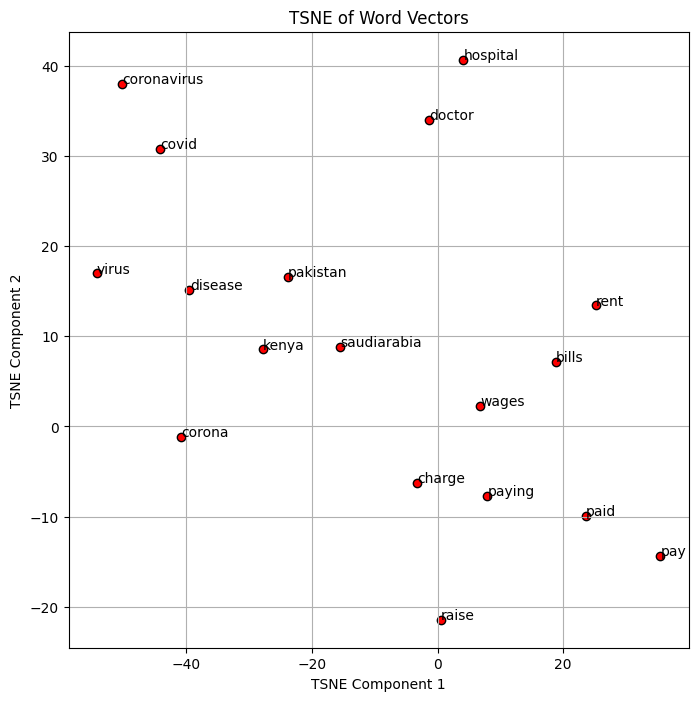

In [ ]:
# Example usage for t-SNE
display_word_embedding(w2v, ['coronavirus', 'covid', 'virus', 'corona', 'disease',
                               'saudiarabia', 'doctor', 'hospital', 'pakistan',
                               'kenya', 'pay', 'paying', 'paid', 'wages',
                               'raise', 'bills', 'rent', 'charge'], method='tsne')

## Task

In [ ]:
# import the libraries



In [ ]:
# Sample documents
documents = [
    "Machine learning is fascinating and involves algorithms.",
    "Python is a popular programming language for machine learning.",
    "Linear regression is a simple machine learning algorithm.",
    "Natural language processing deals with text and language understanding."
]

In [ ]:
# TF-IDF Vectorizer



In [ ]:
# Calculate cosine similarity

